In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# checking for unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
mean_weight = df['Item_Weight'].mean()
median_weight = df['Item_Weight'].median()
print(" The mean weight is:",mean_weight,"\n","The median weight is:",median_weight)

 The mean weight is: 12.857645184136183 
 The median weight is: 12.6


In [9]:
df['Item_Weight']=df['Item_Weight'].fillna(mean_weight)
df['Item_Weight']=df['Item_Weight'].fillna(median_weight)

In [10]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
497,FDR56,12.857645,Regular,0.100278,Fruits and Vegetables,196.8768,OUT027,1985,Medium,Tier 3,Supermarket Type3,7094.7648
4003,DRO47,10.195000,Low Fat,0.000000,Hard Drinks,114.0860,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760
8436,FDH33,12.850000,Low Fat,0.121725,Snack Foods,45.1428,OUT046,1997,Small,Tier 1,Supermarket Type1,527.3136
2617,FDD50,18.850000,Low Fat,0.142219,Canned,167.6132,OUT018,2009,Medium,Tier 3,Supermarket Type2,1522.0188
3942,FDX11,16.000000,Regular,0.106918,Baking Goods,183.5634,OUT049,1999,Medium,Tier 1,Supermarket Type1,4725.8484


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
print("test mode, train mode\n",[df['Outlet_Size'].mode().values[0], df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [13]:
#train
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].dropna().mode().values[0])


In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Exploratory Data Analysis


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

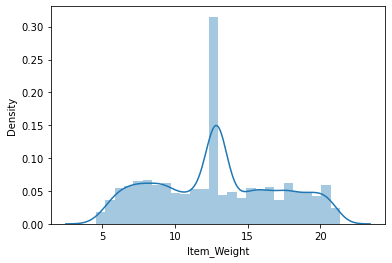

In [16]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

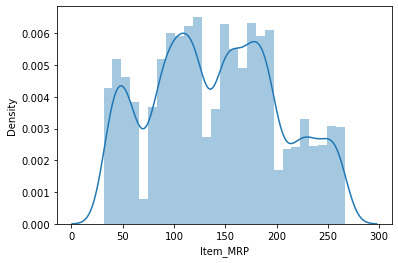

In [17]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

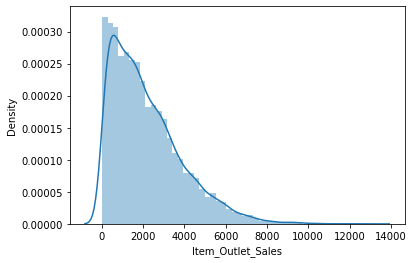

In [18]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

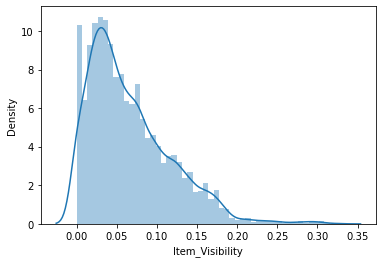

In [19]:
sns.distplot(df['Item_Visibility'])

In [20]:
# Using label encoding for ordinal data
size_mapping = {'Small': 0, 'Medium': 1, 'High': 2}
df['Outlet_Size'] = [size_mapping[size] for size in df['Outlet_Size']]

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

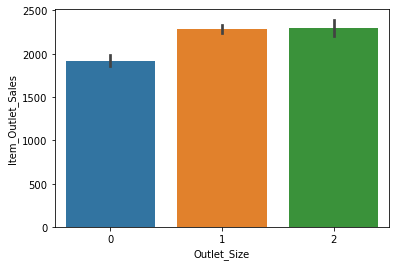

In [21]:
sns.barplot(x='Outlet_Size' , y='Item_Outlet_Sales' , data = df)

In [22]:
df['Outlet_Location_Type'].nunique()

3

In [23]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [24]:
# Using label encoding for ordinal data
size_mapping = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
df['Outlet_Location_Type'] = [size_mapping[size] for size in df['Outlet_Location_Type']]

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

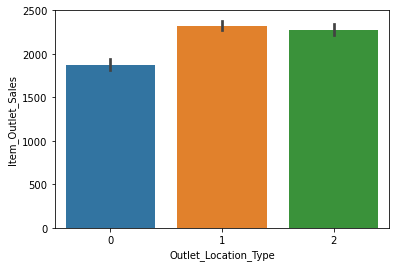

In [25]:
sns.barplot(x='Outlet_Location_Type' , y='Item_Outlet_Sales' , data = df)

In [26]:
# Using label encoding for ordinal data
size_mapping = {'Grocery Store': 0, 'Supermarket Type2': 1, 'Supermarket Type3': 2 ,'Supermarket Type1' : 3}
df['Outlet_Type'] = [size_mapping[size] for size in df['Outlet_Type']]

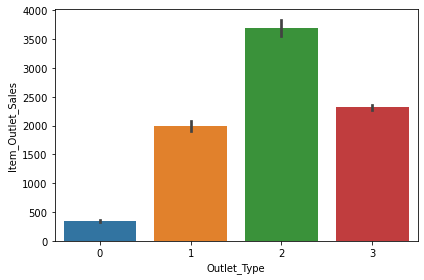

In [27]:
sns.barplot(x='Outlet_Type' , y='Item_Outlet_Sales' , data = df)
plt.tight_layout()

<AxesSubplot:>

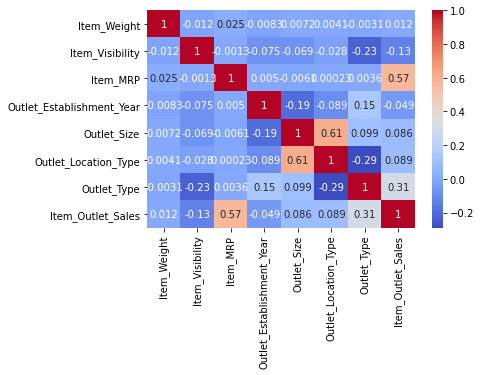

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [29]:
to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']

In [30]:
X = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in to_encode:
    X[col] = le.fit_transform(X[col])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [35]:
num_cols = [col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and (col != 'Outlet_Identifier')]

In [36]:
num_cols.remove('Item_Outlet_Sales')
num_cols.remove('Item_MRP')

In [37]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [38]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [39]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [40]:
df.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [41]:
df['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [42]:
df['Item_Fat_Content'].unique()

array(['LF', 'Regular'], dtype=object)

In [46]:
from sklearn import metrics

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
predictions = lm.predict(X_test)

In [51]:
lm.score(X_test,y_test)

0.5112137508772141